# Plan of Action-
1. Downloading the data from -

a. https://fred.stlouisfed.org/series/CSUSHPISA which is going to be our target variable '**housing price index**' while using linear regression algorithm.

b. https://fred.stlouisfed.org/series/MEHOINUSA672N which is going to be '**household**' column in our datset.

c. https://fred.stlouisfed.org/series/MEDCPIM158SFRBCLE which is going to be '**consumer price index**' column.

d. https://fred.stlouisfed.org/series/MSACSR which is going to be '**new house supply**' column in our datset.

e. https://fred.stlouisfed.org/series/UNRATE which is going to be '**unemployment rate**' column in datset.

f. https://fred.stlouisfed.org/series/LFWA64TTUSM647S which is going to be '**working age population**' column in datset.

g. https://fred.stlouisfed.org/series/MORTGAGE30US which is goint to be '**interest rate**' column in our datset.

h. https://fred.stlouisfed.org/series/A939RX0Q048SBEA which is goint to be '**per capita GDP**' column in our datset.

i. https://fred.stlouisfed.org/series/TTLHH which is going to be '**total number of household**' column in datset.

j. https://fred.stlouisfed.org/series/L312051A027NBEA which is goint to be '**housing subsidy**' column in our datset.
2. **Uploading** the data into colab from downloaded files
3. **Renaming** the columns so that column names are easily comprehended.
4. Merging **dataframes of monthly columns** separately
5. Making **dataframes of annual columns** separately
6. Now **merging annual dataframes**.
7. **Merging** **both** the dataframes then cleaning the dataset with columns containing NaN values.
8. **Generating CSV file** for data preparation
9. **EDA & Data Visualization** of the dataset for easy understanding.
10. Then proceeding to making **Linear Regression** model.
11. **Conclusion**.

# Proceeding with Step 2 & 3 : Uploading the data into colab from downloaded csv files and renaming columns too parallely.

In [1]:
# Importing dependencies
import pandas as pd

# a. Consumer Price Index
Reading first data on colab which is Consumer price index. I am using full forms for better readability of columns in dataset.

In [2]:
# Reading the dataset
consumer_price_index = pd.read_csv('Consumer Price Index.csv')
consumer_price_index.head()

,DATE,MEDCPIM158SFRBCLE
0,1983-01-01,5.014653
1,1983-02-01,4.952545
2,1983-03-01,3.612261
3,1983-04-01,4.828054
4,1983-05-01,3.767326


In [3]:
# Renaming column 'MEDCPIM158SFRBCLE' for better understanding
consumer_price_index.rename(columns = {'MEDCPIM158SFRBCLE': 'CPI'}, inplace = True)
consumer_price_index.head()

,DATE,CPI
0,1983-01-01,5.014653
1,1983-02-01,4.952545
2,1983-03-01,3.612261
3,1983-04-01,4.828054
4,1983-05-01,3.767326


In [4]:
# Let's check the datatype
consumer_price_index.dtypes

DATE     object
CPI     float64
dtype: object

It is to be observed here that date column is object times which needs to be changed to DATE type, while for CPI it's in justified format.

In [5]:
# Conversion of object type into datetime format.
consumer_price_index['DATE'] = pd.to_datetime(consumer_price_index['DATE'])
consumer_price_index.dtypes

DATE    datetime64[ns]
CPI            float64
dtype: object

In [6]:
# Creating a mask to select dates post December 2003
mask_date = consumer_price_index['DATE'] > '2003-12-31'

In [7]:
# Now applying above mask to filter consumer price index data
consumer_price_index = consumer_price_index[mask_date]

In [8]:
# Resetting the index to normal indexes and not in haphazard manner
consumer_price_index.reset_index(drop=True, inplace=True)

In [9]:
# Display new dataframe
consumer_price_index.head()

,DATE,CPI
0,2004-01-01,2.220075
1,2004-02-01,2.912655
2,2004-03-01,2.734402
3,2004-04-01,2.538382
4,2004-05-01,3.217495


In [10]:
# Set 'DATE' column as the index
consumer_price_index.set_index('DATE', inplace=True)
consumer_price_index.head()

,CPI
DATE,
2004-01-01,2.220075
2004-02-01,2.912655
2004-03-01,2.734402
2004-04-01,2.538382
2004-05-01,3.217495


# b. New House Supply
We'll apply the same steps as we have used for CPI.

In [11]:
# Reading the dataset
new_house_supply = pd.read_csv('New House Supply.csv')
new_house_supply.head()

,DATE,MSACSR
0,1963-01-01,4.7
1,1963-02-01,6.6
2,1963-03-01,6.4
3,1963-04-01,5.3
4,1963-05-01,5.1


In [12]:
# Renaming column 'MSACSR' for better understanding
new_house_supply.rename(columns = {'MSACSR': 'new_house_supp'}, inplace = True)
new_house_supply.head()

,DATE,new_house_supp
0,1963-01-01,4.7
1,1963-02-01,6.6
2,1963-03-01,6.4
3,1963-04-01,5.3
4,1963-05-01,5.1


In [13]:
# converting date column as date type column.
new_house_supply['DATE'] = pd.to_datetime(new_house_supply['DATE'])
new_house_supply.dtypes

DATE              datetime64[ns]
new_house_supp           float64
dtype: object

In [14]:
# Create a mask to select dates post December 2003
mask_date = new_house_supply['DATE'] > '2003-12-31'

In [15]:
# Now applying above mask to filter new house supply data
new_house_supply = new_house_supply[mask_date]

In [16]:
# Resetting the index to normal indexes and not in haphazard manner
new_house_supply.reset_index(drop=True, inplace=True)

In [17]:
# Display new dataframe
new_house_supply.head()

,DATE,new_house_supp
0,2004-01-01,3.8
1,2004-02-01,3.7
2,2004-03-01,3.6
3,2004-04-01,4.0
4,2004-05-01,3.8


In [18]:
# Set 'DATE' column as the index
new_house_supply.set_index('DATE', inplace=True)
new_house_supply.head()

,new_house_supp
DATE,
2004-01-01,3.8
2004-02-01,3.7
2004-03-01,3.6
2004-04-01,4.0
2004-05-01,3.8


# c. Unemployment Rate

In [19]:
# Reading the Unemployment Rate
unemp_rate = pd.read_csv('Unemployment Rate.csv')
unemp_rate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [20]:
# converting date column as date type column.
unemp_rate['DATE'] = pd.to_datetime(unemp_rate['DATE'])
unemp_rate.dtypes

DATE      datetime64[ns]
UNRATE           float64
dtype: object

In [21]:
# Create a mask to select dates post December 2003
mask_date = unemp_rate['DATE'] > '2003-12-31'

In [22]:
# Now applying above mask to filter unemployment rate data
unemp_rate = unemp_rate[mask_date]

In [23]:
# Resetting the index to normal indexes and not in haphazard manner
unemp_rate.reset_index(drop=True, inplace=True)

In [24]:
# Display new dataframe
unemp_rate.head()

,DATE,UNRATE
0,2004-01-01,5.7
1,2004-02-01,5.6
2,2004-03-01,5.8
3,2004-04-01,5.6
4,2004-05-01,5.6


In [25]:
# Set 'DATE' column as the index
unemp_rate.set_index('DATE', inplace=True)
unemp_rate.head()

,UNRATE
DATE,
2004-01-01,5.7
2004-02-01,5.6
2004-03-01,5.8
2004-04-01,5.6
2004-05-01,5.6


# d. Housing Price Index.
This will be our target variable.

In [26]:
# Reading the dataframe
HPI = pd.read_csv('Housing Price Index.csv')
HPI.head()

,DATE,CSUSHPINSA
0,1987-01-01,63.735
1,1987-02-01,64.135
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547


In [27]:
# Renaming column 'CSUSHPINSA' for better understanding
HPI.rename(columns = {'CSUSHPINSA': 'housing_price_ind'}, inplace = True)
HPI.head()

,DATE,housing_price_ind
0,1987-01-01,63.735
1,1987-02-01,64.135
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547


In [28]:
# converting date column as date type column.
HPI['DATE'] = pd.to_datetime(HPI['DATE'])
HPI.dtypes

DATE                 datetime64[ns]
housing_price_ind           float64
dtype: object

In [29]:
# Create a mask to select dates post December 2003
mask_date = HPI['DATE'] > '2003-12-31'

In [30]:
# Applying the mask to filter HPI data
HPI = HPI[mask_date]

In [31]:
# Resetting the index to normal indexes and not in haphazard manner
HPI.reset_index(drop=True, inplace=True)

In [32]:
# Display new dataframe
HPI.head()

,DATE,housing_price_ind
0,2004-01-01,140.705
1,2004-02-01,142.028
2,2004-03-01,144.079
3,2004-04-01,146.179
4,2004-05-01,148.334


In [33]:
# Set 'DATE' column as the index
HPI.set_index('DATE', inplace=True)
HPI.head()

,housing_price_ind
DATE,
2004-01-01,140.705
2004-02-01,142.028
2004-03-01,144.079
2004-04-01,146.179
2004-05-01,148.334


# e. Working Age Population

In [34]:
# Reading the dataset
working_age_pop = pd.read_csv('Working Age Population.csv')
working_age_pop.head()

,DATE,LFWA64TTUSM647S
0,1977-01-01,135212200.0
1,1977-02-01,135414200.0
2,1977-03-01,135623700.0
3,1977-04-01,135783700.0
4,1977-05-01,136108200.0


In [35]:
# Renaming column 'LFWA64TTUSM647S' for better understanding
working_age_pop.rename(columns = {'LFWA64TTUSM647S': 'work_age_pop'}, inplace = True)
working_age_pop.head()

,DATE,work_age_pop
0,1977-01-01,135212200.0
1,1977-02-01,135414200.0
2,1977-03-01,135623700.0
3,1977-04-01,135783700.0
4,1977-05-01,136108200.0


In [36]:
# converting date column as date type column.
working_age_pop['DATE'] = pd.to_datetime(working_age_pop['DATE'])
working_age_pop.dtypes

DATE            datetime64[ns]
work_age_pop           float64
dtype: object

In [37]:
# Create a mask to select dates post December 2003
mask_date = working_age_pop['DATE'] > '2003-12-31'

In [38]:
# Applying the mask to filter working_age_pop data
working_age_pop = working_age_pop[mask_date]

In [39]:
# Resetting the index to normal indexes and not in haphazard manner
working_age_pop.reset_index(drop=True, inplace=True)

In [40]:
# Display new dataframe
working_age_pop.head()

,DATE,work_age_pop
0,2004-01-01,187568500.0
1,2004-02-01,187831800.0
2,2004-03-01,188106500.0
3,2004-04-01,188337000.0
4,2004-05-01,188540100.0


In [41]:
# Set 'DATE' column as the index
working_age_pop.set_index('DATE', inplace=True)
working_age_pop.head()

,work_age_pop
DATE,
2004-01-01,187568500.0
2004-02-01,187831800.0
2004-03-01,188106500.0
2004-04-01,188337000.0
2004-05-01,188540100.0


# f. Interest Rate

In [42]:
# Reading the dataset
interest_rate = pd.read_csv('Interest Rate.csv')
interest_rate.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [43]:
# Renaming column 'MORTGAGE30US' for better understanding
interest_rate.rename(columns = {'MORTGAGE30US': 'interest_rate'}, inplace = True)
interest_rate.head()

,DATE,interest_rate
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [44]:
# converting date column as date type column.
interest_rate['DATE'] = pd.to_datetime(interest_rate['DATE'])
interest_rate.dtypes

DATE             datetime64[ns]
interest_rate           float64
dtype: object

In [45]:
# Create a mask to select dates post December 2003
mask_date = interest_rate['DATE'] > '2003-12-30'

In [46]:
# Applying the mask to filter interest rate data
interest_rate = interest_rate[mask_date]

In [47]:
# Resetting the index to normal indexes and not in haphazard manner
interest_rate.reset_index(drop=True, inplace=True)

In [48]:
# Display new DataFrame
interest_rate.head()

,DATE,interest_rate
0,2003-12-31,5.85
1,2004-01-08,5.87
2,2004-01-15,5.66
3,2004-01-22,5.64
4,2004-01-29,5.68


In [49]:
# Resample to monthly frequency and calculate the mean
# Set the 'DATE' column as index before resampling
monthly_avg_int_rate = interest_rate.set_index('DATE').resample('M').mean()
monthly_avg_int_rate.head()

,interest_rate
DATE,
2003-12-31,5.8500
2004-01-31,5.7125
2004-02-29,5.6350
2004-03-31,5.4450
2004-04-30,5.8300


In [50]:
# Adjust to the first day of each month
monthly_avg_int_rate.index = monthly_avg_int_rate.index.to_period('M').to_timestamp()
monthly_avg_int_rate.head()

,interest_rate
DATE,
2003-12-01,5.8500
2004-01-01,5.7125
2004-02-01,5.6350
2004-03-01,5.4450
2004-04-01,5.8300


# g. per capita GDP

In [51]:
# Reading the dataset
per_capita_gdp = pd.read_csv('GDP per Capita.csv')
per_capita_gdp.head()

,DATE,A939RX0Q048SBEA
0,1947-01-01,15248.0
1,1947-04-01,15139.0
2,1947-07-01,15039.0
3,1947-10-01,15204.0
4,1948-01-01,15371.0


In [52]:
# Renaming column 'A939RX0Q048SBEA' for better understanding
per_capita_gdp.rename(columns = {'A939RX0Q048SBEA': 'per_capita_gdp'}, inplace = True)
per_capita_gdp.head()

,DATE,per_capita_gdp
0,1947-01-01,15248.0
1,1947-04-01,15139.0
2,1947-07-01,15039.0
3,1947-10-01,15204.0
4,1948-01-01,15371.0


In [53]:
# converting date column as date type column.
per_capita_gdp['DATE'] = pd.to_datetime(per_capita_gdp['DATE'])
per_capita_gdp.dtypes

DATE              datetime64[ns]
per_capita_gdp           float64
dtype: object

In [54]:
# Create a mask to select dates post December 2003
mask_date = per_capita_gdp['DATE'] > '2003-12-30'

In [55]:
# Applying the mask to filter per capita GDP data
per_capita_gdp = per_capita_gdp[mask_date]

In [56]:
# Resetting the index to normal indexes and not in haphazard manner
per_capita_gdp.reset_index(drop=True, inplace=True)

In [57]:
# Display new DataFrame
per_capita_gdp.head()

,DATE,per_capita_gdp
0,2004-01-01,52179.0
1,2004-04-01,52469.0
2,2004-07-01,52835.0
3,2004-10-01,53242.0
4,2005-01-01,53719.0


In [58]:
# Resample to monthly frequency
per_capita_gdp_resampled = per_capita_gdp.set_index('DATE').resample('MS').asfreq()

In [59]:
# Interpolate the GDP values
per_capita_gdp_interpolated = per_capita_gdp_resampled.interpolate(method='linear')

In [60]:
# Display the new dataframe
per_capita_gdp_interpolated.head()

,per_capita_gdp
DATE,
2004-01-01,52179.000000
2004-02-01,52275.666667
2004-03-01,52372.333333
2004-04-01,52469.000000
2004-05-01,52591.000000


We are now in the process to join all the monthly dataframes.

# Proceeding with Step 4: Making dataframes of monthly columns separately

In [61]:
# Concatenate the DataFrames along the columns (axis=1)
dataframes = [consumer_price_index, per_capita_gdp_interpolated, monthly_avg_int_rate, working_age_pop, HPI,
              unemp_rate, new_house_supply]
monthly_data = pd.concat(dataframes, axis=1)

In [62]:
# Display the merged DataFrame
monthly_data.head()

,CPI,per_capita_gdp,interest_rate,work_age_pop,housing_price_ind,UNRATE,new_house_supp
DATE,,,,,,,
2003-12-01,NaN,NaN,5.8500,NaN,NaN,NaN,NaN
2004-01-01,2.220075,52179.000000,5.7125,187568500.0,140.705,5.7,3.8
2004-02-01,2.912655,52275.666667,5.6350,187831800.0,142.028,5.6,3.7
2004-03-01,2.734402,52372.333333,5.4450,188106500.0,144.079,5.8,3.6
2004-04-01,2.538382,52469.000000,5.8300,188337000.0,146.179,5.6,4.0


# Proceeding with Step 5: Making dataframes of annual columns separately

# h. Number of Households

In [63]:
# Reading the dataset
no_of_households = pd.read_csv('Total Household.csv')
no_of_households.head()

,DATE,TTLHH
0,1940-01-01,34949
1,1941-01-01,.
2,1942-01-01,.
3,1943-01-01,.
4,1944-01-01,.


In [64]:
# Renaming column 'TTLHH' for better understanding
no_of_households.rename(columns = {'TTLHH': 'total_household'}, inplace = True)
no_of_households.head()

,DATE,total_household
0,1940-01-01,34949
1,1941-01-01,.
2,1942-01-01,.
3,1943-01-01,.
4,1944-01-01,.


In [65]:
# converting date column as date type column.
no_of_households['DATE'] = pd.to_datetime(no_of_households['DATE'])
no_of_households.dtypes

DATE               datetime64[ns]
total_household            object
dtype: object

In [66]:
# Create a mask to select dates post December 2003
mask_date = no_of_households['DATE'] > '2003-12-30'

In [67]:
# Applying the mask to filter number of households data
no_of_households = no_of_households[mask_date]

In [68]:
# Resetting the index to normal indexes and not in haphazard manner
no_of_households.reset_index(drop=True, inplace=True)

In [69]:
# Display new DataFrame
no_of_households.head()

,DATE,total_household
0,2004-01-01,112000
1,2005-01-01,113343
2,2006-01-01,114384
3,2007-01-01,116011
4,2008-01-01,116783


In [70]:
# Set 'DATE' column as index
no_of_households.set_index('DATE', inplace=True)

In [71]:
# Resample to monthly frequency and forward fill
no_of_households_monthly = no_of_households.resample('M').ffill()

In [72]:
# Display the resulting DataFrame
no_of_households_monthly.head()

,total_household
DATE,
2004-01-31,112000
2004-02-29,112000
2004-03-31,112000
2004-04-30,112000
2004-05-31,112000


In [73]:
# Adjust to the first day of each month
no_of_households_monthly.index = no_of_households_monthly.index.to_period('M').to_timestamp()
no_of_households_monthly.head()

,total_household
DATE,
2004-01-01,112000
2004-02-01,112000
2004-03-01,112000
2004-04-01,112000
2004-05-01,112000


# i. Housing Subsidy

In [74]:
# Reading the dataset
housing_subsidy = pd.read_csv('Housing Subsidy.csv')
housing_subsidy.head()

,DATE,L312051A027NBEA
0,1960-01-01,0.146
1,1961-01-01,0.159
2,1962-01-01,0.176
3,1963-01-01,0.195
4,1964-01-01,0.210


In [75]:
# Renaming column 'L312051A027NBEA' for better understanding
housing_subsidy.rename(columns = {'L312051A027NBEA': 'housing_subsidy'}, inplace = True)
housing_subsidy.head()

,DATE,housing_subsidy
0,1960-01-01,0.146
1,1961-01-01,0.159
2,1962-01-01,0.176
3,1963-01-01,0.195
4,1964-01-01,0.210


In [76]:
# converting date column as date type column.
housing_subsidy['DATE'] = pd.to_datetime(housing_subsidy['DATE'])
housing_subsidy.dtypes

DATE               datetime64[ns]
housing_subsidy           float64
dtype: object

In [77]:
# Create a mask to select dates post December 2003
mask_date = housing_subsidy['DATE'] > '2003-12-30'

In [78]:
# Applying the mask to filter housing subsidy data
housing_subsidy = housing_subsidy[mask_date]

In [79]:
# Resetting the index to normal indexes and not in haphazard manner
housing_subsidy.reset_index(drop=True, inplace=True)

In [80]:
# Display new DataFrame
housing_subsidy.head()

,DATE,housing_subsidy
0,2004-01-01,27.201
1,2005-01-01,27.651
2,2006-01-01,28.604
3,2007-01-01,29.512
4,2008-01-01,29.876


In [81]:
# Set 'DATE' column as index
housing_subsidy.set_index('DATE', inplace = True)  # Assign the result back to housing_subsidy

In [82]:
# Resample to monthly frequency and forward fill
housing_subsidy_monthly = housing_subsidy.resample('M').ffill()

In [83]:
# Display the resulting DataFrame
housing_subsidy_monthly.head()

,housing_subsidy
DATE,
2004-01-31,27.201
2004-02-29,27.201
2004-03-31,27.201
2004-04-30,27.201
2004-05-31,27.201


In [84]:
# Adjust to the first day of each month
housing_subsidy_monthly.index = housing_subsidy_monthly.index.to_period('M').to_timestamp()
housing_subsidy_monthly.head()

,housing_subsidy
DATE,
2004-01-01,27.201
2004-02-01,27.201
2004-03-01,27.201
2004-04-01,27.201
2004-05-01,27.201


# j. Real Household Income

In [85]:
# Reading the dataset
real_household_income = pd.read_csv('Household Income.csv')
real_household_income.head()

,DATE,MEHOINUSA646N
0,1984-01-01,22420
1,1985-01-01,23620
2,1986-01-01,24900
3,1987-01-01,26060
4,1988-01-01,27230


In [86]:
# Renaming column 'MEHOINUSA646N' for better understanding
real_household_income.rename(columns = {'MEHOINUSA646N': 'real_household_income'}, inplace = True)
real_household_income.head()

,DATE,real_household_income
0,1984-01-01,22420
1,1985-01-01,23620
2,1986-01-01,24900
3,1987-01-01,26060
4,1988-01-01,27230


In [87]:
# converting date column as date type column.
real_household_income['DATE'] = pd.to_datetime(real_household_income['DATE'])
real_household_income.dtypes

DATE                     datetime64[ns]
real_household_income             int64
dtype: object

In [88]:
# Create a mask to select dates post December 2003
mask_date = real_household_income['DATE'] > '2003-12-30'

In [89]:
# Applying the mask to filter real household income data
real_household_income = real_household_income[mask_date]

In [90]:
# Resetting the index to normal indexes and not in haphazard manner
real_household_income.reset_index(drop=True, inplace=True)

In [91]:
# Display the filtered DataFrame
real_household_income.head()

,DATE,real_household_income
0,2004-01-01,44330
1,2005-01-01,46330
2,2006-01-01,48200
3,2007-01-01,50230
4,2008-01-01,50300


In [92]:
# Set 'DATE' column as index
real_household_income.set_index('DATE', inplace = True)  # Assign the result back to housing_subsidy

In [93]:
# Resample to monthly frequency and forward fill
real_household_income_monthly = real_household_income.resample('M').ffill()

In [94]:
# Display the resulting DataFrame
real_household_income_monthly.head()

,real_household_income
DATE,
2004-01-31,44330
2004-02-29,44330
2004-03-31,44330
2004-04-30,44330
2004-05-31,44330


In [95]:
# Adjust to the first day of each month
real_household_income_monthly.index = real_household_income_monthly.index.to_period('M').to_timestamp()
real_household_income_monthly.head()

,real_household_income
DATE,
2004-01-01,44330
2004-02-01,44330
2004-03-01,44330
2004-04-01,44330
2004-05-01,44330


# Proceeding with Step 6 : Now merging annual dataframes.

In [96]:
# Concatenate the DataFrames along the columns (axis=1)
dataframe = [real_household_income_monthly, housing_subsidy_monthly, no_of_households_monthly]
annual_data = pd.concat(dataframe, axis=1)

In [97]:
# Display the merged DataFrame
annual_data.head()

,real_household_income,housing_subsidy,total_household
DATE,,,
2004-01-01,44330.0,27.201,112000
2004-02-01,44330.0,27.201,112000
2004-03-01,44330.0,27.201,112000
2004-04-01,44330.0,27.201,112000
2004-05-01,44330.0,27.201,112000


# Proceeding with Step 7: Merging of annual and monthly dataframe

In [98]:
merged_df = pd.merge(annual_data, monthly_data, on='DATE', how='outer')
merged_df

,real_household_income,housing_subsidy,total_household,CPI,per_capita_gdp,interest_rate,work_age_pop,housing_price_ind,UNRATE,new_house_supp
DATE,,,,,,,,,,
2004-01-01,44330.0,27.201,112000,2.220075,52179.000000,5.7125,187568500.0,140.705,5.7,3.8
2004-02-01,44330.0,27.201,112000,2.912655,52275.666667,5.6350,187831800.0,142.028,5.6,3.7
2004-03-01,44330.0,27.201,112000,2.734402,52372.333333,5.4450,188106500.0,144.079,5.8,3.6
2004-04-01,44330.0,27.201,112000,2.538382,52469.000000,5.8300,188337000.0,146.179,5.6,4.0
2004-05-01,44330.0,27.201,112000,3.217495,52591.000000,6.2700,188540100.0,148.334,5.6,3.8
...,...,...,...,...,...,...,...,...,...,...
2024-02-01,NaN,NaN,NaN,4.558160,NaN,6.7760,208640600.0,312.632,3.9,8.9
2024-03-01,NaN,NaN,NaN,4.327346,NaN,6.8200,208580800.0,316.646,3.8,8.5
2024-04-01,NaN,NaN,NaN,4.251323,NaN,6.9925,208530600.0,NaN,3.9,9.1


In [99]:
# Checking on how many null values are present in each column.
merged_df.isnull().sum()

real_household_income    30
housing_subsidy          30
total_household          18
CPI                       3
per_capita_gdp            6
interest_rate             0
work_age_pop              3
housing_price_ind         4
UNRATE                    2
new_house_supp            3
dtype: int64

Here, it is to be noted that the data for year 2023 and 2024 isn't available for three columns namely real_household_income,	housing_subsidy and	total_household due to which there are more null values in them.

# Proceeding to Step 8: Generating CSV file for data preparation

In [100]:
df = pd.DataFrame(merged_df)

# Convert DataFrame to CSV
df.to_csv('HomeLLC.csv', index=False)

We have named the dataset as HomeLLC.csv

# Proceeding to Step 9: Starting with the analysis of data.

In [101]:
# Importing dependencies that's required for making Linear regression model or algorithm.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings

In [102]:
# Reading the dataframe HOMELLC
HomeLLC = pd.read_csv('HomeLLC.csv')
HomeLLC

,real_household_income,housing_subsidy,total_household,CPI,per_capita_gdp,interest_rate,work_age_pop,housing_price_ind,UNRATE,new_house_supp
0,44330.0,27.201,112000.0,2.220075,52179.000000,5.7125,187568500.0,140.705,5.7,3.8
1,44330.0,27.201,112000.0,2.912655,52275.666667,5.6350,187831800.0,142.028,5.6,3.7
2,44330.0,27.201,112000.0,2.734402,52372.333333,5.4450,188106500.0,144.079,5.8,3.6
3,44330.0,27.201,112000.0,2.538382,52469.000000,5.8300,188337000.0,146.179,5.6,4.0
4,44330.0,27.201,112000.0,3.217495,52591.000000,6.2700,188540100.0,148.334,5.6,3.8
...,...,...,...,...,...,...,...,...,...,...
242,NaN,NaN,NaN,4.558160,NaN,6.7760,208640600.0,312.632,3.9,8.9
243,NaN,NaN,NaN,4.327346,NaN,6.8200,208580800.0,316.646,3.8,8.5
244,NaN,NaN,NaN,4.251323,NaN,6.9925,208530600.0,NaN,3.9,9.1
245,NaN,NaN,NaN,NaN,NaN,7.0600,NaN,NaN,4.0,NaN


The dataset contains **247 rows and 10 columns**. Each row of the dataset contains information that is monthly by nature.

Our objective is to find a way to estimate the value in the "**Housing Price Index**" column using the values in the other columns.

If we can do so for the historical data, then we should able to estimate Housing Price Index for new months too, simply by asking for information like their real_household_income,	housing_subsidy,	total_household,	CPI,	per_capita_gdp,	interest_rate,	work_age_pop,	UNRATE,	new_house_supp.

### Let's check the data type for each column.

In [103]:
# Checking the datatype, number of null values, size of HomeLLC dataset.
HomeLLC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   real_household_income  217 non-null    float64
 1   housing_subsidy        217 non-null    float64
 2   total_household        229 non-null    float64
 3   CPI                    244 non-null    float64
 4   per_capita_gdp         241 non-null    float64
 5   interest_rate          247 non-null    float64
 6   work_age_pop           244 non-null    float64
 7   housing_price_ind      243 non-null    float64
 8   UNRATE                 245 non-null    float64
 9   new_house_supp         244 non-null    float64
dtypes: float64(10)
memory usage: 19.4 KB


In [104]:
# Remove rows with NaN in 'housing price index' column since this is going to be our target value
HomeLLC_new = HomeLLC.dropna(subset=['housing_price_ind'])

In [105]:
HomeLLC_new

,real_household_income,housing_subsidy,total_household,CPI,per_capita_gdp,interest_rate,work_age_pop,housing_price_ind,UNRATE,new_house_supp
0,44330.0,27.201,112000.0,2.220075,52179.000000,5.7125,187568500.0,140.705,5.7,3.8
1,44330.0,27.201,112000.0,2.912655,52275.666667,5.6350,187831800.0,142.028,5.6,3.7
2,44330.0,27.201,112000.0,2.734402,52372.333333,5.4450,188106500.0,144.079,5.8,3.6
3,44330.0,27.201,112000.0,2.538382,52469.000000,5.8300,188337000.0,146.179,5.6,4.0
4,44330.0,27.201,112000.0,3.217495,52591.000000,6.2700,188540100.0,148.334,5.6,3.8
...,...,...,...,...,...,...,...,...,...,...
239,NaN,NaN,NaN,5.122615,67557.333333,7.4420,209041500.0,311.969,3.7,8.8
240,NaN,NaN,NaN,4.160125,67601.666667,6.8150,209118700.0,310.774,3.7,8.2
241,NaN,NaN,NaN,6.542477,67646.000000,6.6425,208623100.0,310.521,3.7,8.3
242,NaN,NaN,NaN,4.558160,NaN,6.7760,208640600.0,312.632,3.9,8.9


In [106]:
HomeLLC_new.isnull().sum()

real_household_income    26
housing_subsidy          26
total_household          14
CPI                       0
per_capita_gdp            2
interest_rate             0
work_age_pop              0
housing_price_ind         0
UNRATE                    0
new_house_supp            0
dtype: int64

## Imputing Data

In [107]:
# Interpolate columns containing NaNs.
warnings.filterwarnings("ignore")
HomeLLC_new['real_household_income'] = HomeLLC_new['real_household_income'].interpolate()
HomeLLC_new['housing_subsidy'] = HomeLLC_new['housing_subsidy'].interpolate()
HomeLLC_new['total_household'] = HomeLLC_new['total_household'].interpolate()
HomeLLC_new['per_capita_gdp'] = HomeLLC_new['per_capita_gdp'].interpolate()
HomeLLC_new

,real_household_income,housing_subsidy,total_household,CPI,per_capita_gdp,interest_rate,work_age_pop,housing_price_ind,UNRATE,new_house_supp
0,44330.0,27.201,112000.0,2.220075,52179.000000,5.7125,187568500.0,140.705,5.7,3.8
1,44330.0,27.201,112000.0,2.912655,52275.666667,5.6350,187831800.0,142.028,5.6,3.7
2,44330.0,27.201,112000.0,2.734402,52372.333333,5.4450,188106500.0,144.079,5.8,3.6
3,44330.0,27.201,112000.0,2.538382,52469.000000,5.8300,188337000.0,146.179,5.6,4.0
4,44330.0,27.201,112000.0,3.217495,52591.000000,6.2700,188540100.0,148.334,5.6,3.8
...,...,...,...,...,...,...,...,...,...,...
239,74580.0,48.021,131434.0,5.122615,67557.333333,7.4420,209041500.0,311.969,3.7,8.8
240,74580.0,48.021,131434.0,4.160125,67601.666667,6.8150,209118700.0,310.774,3.7,8.2
241,74580.0,48.021,131434.0,6.542477,67646.000000,6.6425,208623100.0,310.521,3.7,8.3
242,74580.0,48.021,131434.0,4.558160,67646.000000,6.7760,208640600.0,312.632,3.9,8.9


In [108]:
# Checking for null values
HomeLLC_new.isnull().sum()

real_household_income    0
housing_subsidy          0
total_household          0
CPI                      0
per_capita_gdp           0
interest_rate            0
work_age_pop             0
housing_price_ind        0
UNRATE                   0
new_house_supp           0
dtype: int64

None of the columns contain any missing values now.

Here are some statistics for the numerical columns:

In [109]:
HomeLLC_new.describe()

,real_household_income,housing_subsidy,total_household,CPI,per_capita_gdp,interest_rate,work_age_pop,housing_price_ind,UNRATE,new_house_supp
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02,243.000000,243.000000,243.000000
mean,57380.000000,35.933099,122464.370370,2.821639,58281.983539,4.756965,2.013283e+08,190.782671,5.866255,6.365021
std,9607.046484,6.425677,6077.965715,1.476642,4333.928685,1.195368,5.658890e+06,49.683268,2.101970,1.926171
min,44330.000000,27.201000,112000.000000,-0.286064,52179.000000,2.684000,1.875685e+08,133.996000,3.400000,3.300000
25%,50050.000000,32.669000,117181.000000,2.020145,54822.833333,3.803750,1.973536e+08,153.836500,4.350000,5.000000
50%,53660.000000,34.230000,123229.000000,2.504403,56642.000000,4.464000,2.027201e+08,177.529000,5.100000,5.700000
75%,68010.000000,40.185000,128451.000000,3.198960,61621.500000,5.861250,2.057927e+08,205.574500,7.300000,7.600000
max,74580.000000,48.021000,131434.000000,8.048036,67646.000000,7.620000,2.091187e+08,316.646000,14.800000,12.200000


The ranges of values in the numerical columns seem reasonable so we may not have to do much data cleaning or correction. The "housing_price_ind" column seems to be right skewed, as the median (50 percentile) is lower than the mean value.

# Proceeding to Step 9 : Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "housing_price_ind" and other columns.

We'll use libraries Matplotlib and Seaborn for visualization.

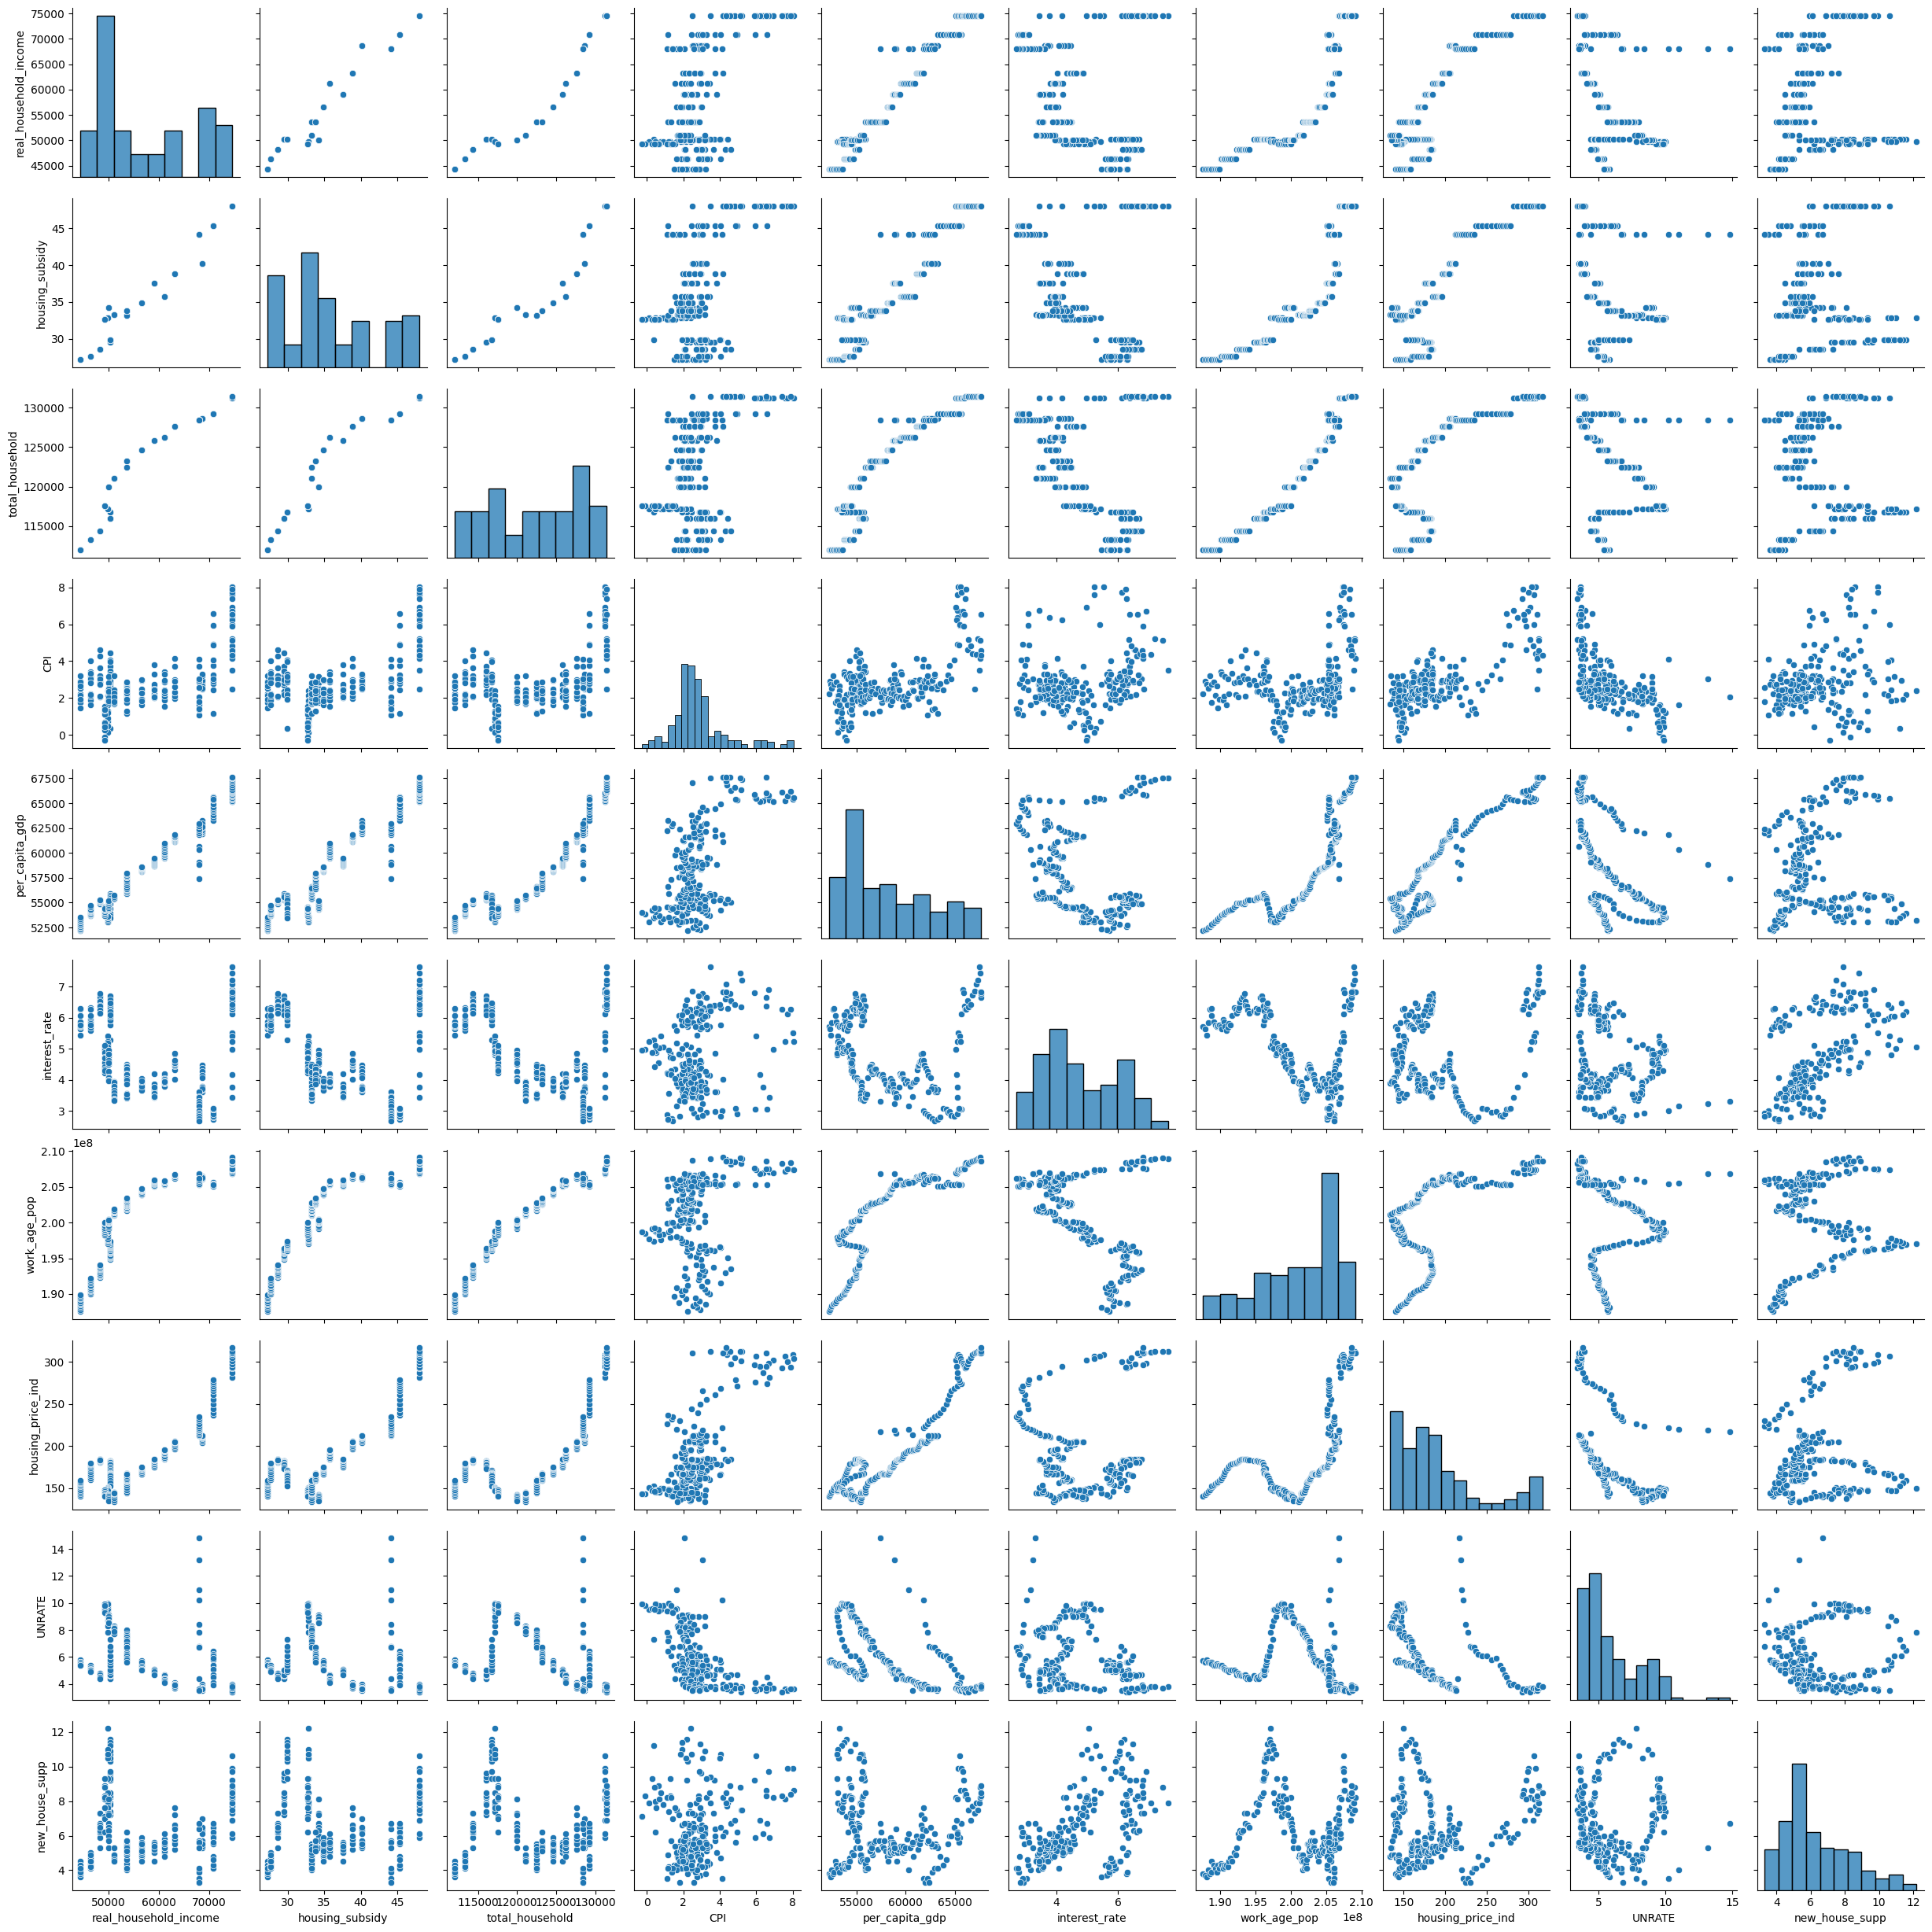

In [110]:
# Making pairplot of the dataset.
sns.pairplot(HomeLLC_new)

We can make following inferences from the pairplot-
1. real_household_income is linearly related to housing subsidy
2. real_household_income is approx. linearly related to total no of household.
3. real_household_income is approx. linearly related to per capita gdp.
4. real_household_income is approx. linearly related to housing price index.
5. housing subsidy is approx. linearly related to total no of household.
6. housing subsidy is approx. linearly related to work age population.
7. housing subsidy is approx. linearly related to housing price index.
8. total no of household is approx. linearly related to per capita gdp.
9. total no of household is approx. linearly related to work age population.
10. total no of household is approx. linearly related to housing price index.
11. per capita GDP is approx. linearly related to work_age_pop.
12. per capita GDP is approx. linearly related to	housing_price_ind.

In [111]:
# Examining the corelation
HomeLLC_new.corr()

,real_household_income,housing_subsidy,total_household,CPI,per_capita_gdp,interest_rate,work_age_pop,housing_price_ind,UNRATE,new_house_supp
real_household_income,1.000000,0.969895,0.948284,0.583446,0.975852,-0.224194,0.855457,0.892452,-0.436793,0.055510
housing_subsidy,0.969895,1.000000,0.936640,0.552044,0.932388,-0.259383,0.858790,0.859229,-0.272161,0.073535
total_household,0.948284,0.936640,1.000000,0.451180,0.922482,-0.413391,0.965642,0.740834,-0.334326,-0.045886
CPI,0.583446,0.552044,0.451180,1.000000,0.623257,0.270021,0.305157,0.745527,-0.564447,0.228561
per_capita_gdp,0.975852,0.932388,0.922482,0.623257,1.000000,-0.148179,0.824409,0.918839,-0.554798,0.028856
interest_rate,-0.224194,-0.259383,-0.413391,0.270021,-0.148179,1.000000,-0.470836,0.146000,-0.279325,0.517346
work_age_pop,0.855457,0.858790,0.965642,0.305157,0.824409,-0.470836,1.000000,0.595734,-0.206553,0.007152
housing_price_ind,0.892452,0.859229,0.740834,0.745527,0.918839,0.146000,0.595734,1.000000,-0.563298,0.178992
UNRATE,-0.436793,-0.272161,-0.334326,-0.564447,-0.554798,-0.279325,-0.206553,-0.563298,1.000000,-0.000068
new_house_supp,0.055510,0.073535,-0.045886,0.228561,0.028856,0.517346,0.007152,0.178992,-0.000068,1.000000


<Axes: >

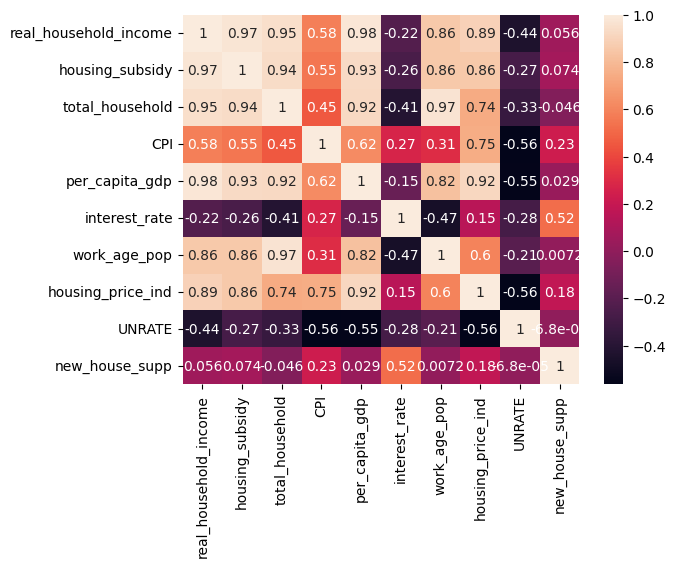

In [112]:
# Plotting corelation on heatmap
sns.heatmap(HomeLLC_new.corr(), annot = True)

From the above heatmap it's clear that features in decreasing order of corelation with housing price index are per capita GDP, real household income, housing subsidy, CPI, total household, working age population.

<Axes: xlabel='housing_price_ind', ylabel='Density'>

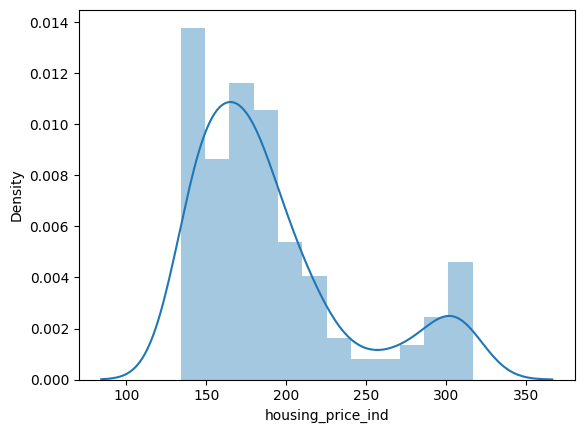

In [113]:
sns.distplot(HomeLLC_new['housing_price_ind'])

Our target variable follows a nearly normal distribution curve thus we are good to start training our data.

# Proceeding to Step 10 : Training the model with Linear Regression model.

In [114]:
# To get the names of columns in dataset.
HomeLLC_new.columns

Index(['real_household_income', 'housing_subsidy', 'total_household', 'CPI',
       'per_capita_gdp', 'interest_rate', 'work_age_pop', 'housing_price_ind',
       'UNRATE', 'new_house_supp'],
      dtype='object')

In [115]:
# Splitting the data in X, y
X = HomeLLC_new.iloc[:,[0,1,2,3,4,5,6,8,9]]
y = HomeLLC_new.iloc[:,7]

In [116]:
# Train test split the data contained in X,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Now, feature scaling so that each variable has similar influence on the model. We use standard scalar.

In [117]:
# fit transform the training data.
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train

array([[-0.94465704, -1.12109592, -1.30239622, ..., -1.40760279,
        -0.60491017, -0.07516793],
       [-0.38080781, -0.3200226 ,  0.13978614, ...,  0.23897772,
         0.42860469, -0.6741624 ],
       [-0.38803665, -0.41134065,  0.01423719, ...,  0.19863414,
         0.79033489, -0.47449758],
       ...,
       [-0.75360923, -0.25472943, -0.39860687, ..., -0.16440533,
         1.66882252, -0.07516793],
       [ 0.60231393,  0.45810571,  0.8501975 , ...,  0.9814226 ,
        -0.96664037,  0.57374274],
       [-0.65343821, -0.40056112, -0.20995735, ...,  0.05278199,
         1.25541658, -0.92374343]])

In [118]:
# Transforming to standard values.
X_test = ss.transform(X_test)
X_test

array([[-9.44657044e-01, -1.12109592e+00, -1.30239622e+00,
         1.17788340e-02, -7.78774357e-01,  1.12588293e+00,
        -1.55865829e+00, -5.53234425e-01, -5.74329993e-01],
       [-1.34430842e+00, -1.33714857e+00, -1.69110879e+00,
        -7.35013631e-01, -1.25900815e+00,  1.05217067e+00,
        -2.18126781e+00, -1.39828481e-01, -9.73659640e-01],
       [ 1.74779899e-01,  2.56528434e-01,  5.62087132e-01,
        -2.47168545e-01,  2.07939268e-01, -1.09790832e+00,
         7.99076661e-01, -3.98207196e-01, -6.24246199e-01],
       [ 1.77958157e+00,  1.86899262e+00,  1.47761612e+00,
         1.32270581e+00,  1.89809286e+00,  1.35778667e+00,
         1.29093431e+00, -1.06999185e+00,  2.24329302e-01],
       [ 1.77958157e+00,  1.86899262e+00,  1.47761612e+00,
         1.51336262e+00,  2.12061036e+00,  2.20009419e+00,
         1.37998903e+00, -1.06999185e+00,  1.17273721e+00],
       [ 6.02313934e-01,  4.58105707e-01,  8.50197501e-01,
        -3.82426253e-01,  7.57881946e-01, -1.951401

### Training the model with Linear Regression model.

In [119]:
# Importing linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Predictions

In [120]:
# contains the predicted values of y using X_test
y_pred = lm.predict(X_test)

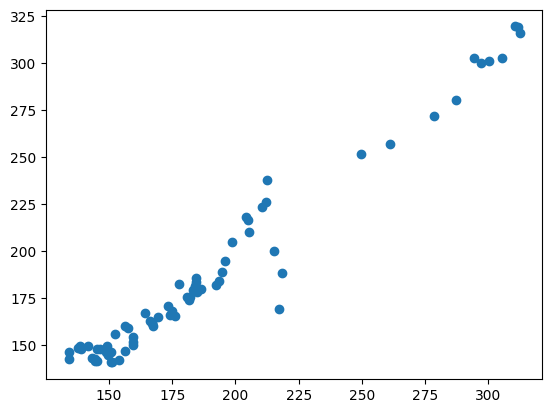

In [121]:
# We can use scatterplot to see if the y_pred and y_test values match
plt.scatter(y_test,y_pred)

Since this is a rough straight line it means we are going onto a good path of building the model.

Here, the residuals seem to be approximately normally distributed and this shows that this model is correct choice for using this data.

# Evaluating the model using Regression evaluation metrics

In [122]:
# MAE,MSE,RMSE all are loss function which are to be minimised in regression problems.
# Gives mean absolute error
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))

MAE: 7.2693104083081606


In [123]:
# Gives root mean squared errror
import numpy as np
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  10.083012509448317


**RMSE** here is the average magnitude of the errors between predicted values and the actual values in the test set.

It actually in our model shows how much the **housing index predictions deviate** from the actual values on an average.

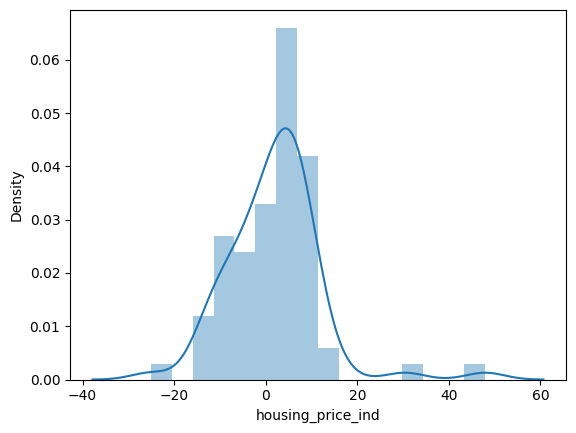

In [124]:
# To check the residuals
sns.distplot((y_test-y_pred))
# To ignore warnings
warnings.filterwarnings("ignore")

This calculates the density plot of residuals, which is difference between the **actual values**  which is **y_test** and the **predicted values** which is **y_pred**.

The Residuals indicate **how far off** each prediction is from the actual value.

**Positive residuals** = **overestimation**

**Negative residuals** = **underestimation**

In [125]:
# Generating a datframe of columns and their coefficients.
HomeLLC_coefficients = pd.DataFrame(lm.coef_,X.columns, columns = ["Coefficients"])
HomeLLC_coefficients

,Coefficients
real_household_income,6.281463
housing_subsidy,27.154429
total_household,-32.942769
CPI,3.773518
per_capita_gdp,45.499984
interest_rate,6.519625
work_age_pop,-3.011053
UNRATE,-1.726481
new_house_supp,0.137989


# Proceeding to Step 11: Conclusion

The coefficients we have found from our linear regression model with the target variable as the housing index represent the **relationship** between each independent **variable** and the housing index.

Since there are **9 independent variables** we'll be assuming that we make 8 columns constant and will match only 1 column coefficient with the target value and this will be done for all column respectively taken one at a time.

1. **real_household_income** : The coefficient value is **6.281463**. For every 1 unit increase in this variable, the target variable i.e. **housing index** is expected to **increase by 6.281463 units**, assuming all other variables remain constant. It suggests that higher household income is associated with a higher housing index.

2. **housing_subsidy** : The coefficient value is **27.154429**. For every 1 unit increase in housing subsidy, the housing index is expected to increase by 27.154429 units, assuming all other variables remain constant. It also suggests that housing subsidies increase with the housing index.

3. **total_household** : The coefficient value is **-32.942769**.For every 1 unit increase in the total households, the housing index is expected to **decrease by 32.942769 units**, assuming all other variables remain constant. Here, negative coefficient depicts that an increase in the number of households is associated with a decrease in the housing index.

4. **CPI** : The coefficient value is **3.773518**. For every one-unit increase in the Consumer Price Index (CPI), the housing index is expected to increase by 3.773518 units, assuming all other variables remain constant. It suggests that higher CPI is associated with a higher housing index.

5. **per_capita_gdp** : The coefficient value is **45.499984**. For every 1 unit increase in per capita GDP, the housing index is expected to increase by 45.499984 units, assuming all other variables remain constant. It indicates that higher economic output per person is strongly associated with a higher housing index.

6. **interest_rate** : The coefficient value is **6.519625**. For every 1 unit increase in the interest rate, the housing index is expected to increase by 6.519625 units, assuming all other variables remain constant. This suggests that  interest rates correlate positively with the housing index.

7. **work_age_pop** (-3.011053): The coefficient value is **-3.011053**. For every 1 unit increase in the working-age population, the housing index is expected to decrease by 3.011053 units, assuming all other variables remain constant. It suggest that an increase in the working-age population might not translate directly into higher housing demand.

8. **UNRATE** (-1.726481): The coefficient value is **-1.726481**. For every 1 unit increase in the unemployment rate, the housing index is expected to decrease by 1.726481 units, assuming all other variables remain constant. This suggests that higher unemployment rates are associated with a lower housing index.

9. **new_house_supp** (0.137989): The coefficient value is **0.137989**. For every 1 unit increase in the supply of new houses, the housing index is expected to increase by 0.137989 units, assuming all other variables remain constant. It indicates that an increase in new housing supply is associated with a slight increase in the housing index.

Lastly, these coefficients show the expected change in the housing index for a 1 unit change in each independent variable keeping all other variables constant. The signs and magnitudes of these coefficients offer insights into the relationships between these economic factors and the housing market.